### Random Selection

In [1]:
dataset = read.csv('Ads_CTR_Optimisation.csv')
head(dataset)

Ad.1,Ad.2,Ad.3,Ad.4,Ad.5,Ad.6,Ad.7,Ad.8,Ad.9,Ad.10
1,0,0,0,1,0,0,0,1,0
0,0,0,0,0,0,0,0,1,0
0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0


In [2]:
# Maximum clicked Ad column
table(dataset['Ad.5'])


   0    1 
7305 2695 

#### So here we have Dataset which already has data of ads clicked by our customers. But we want to predict early on which ad shall be most clicked. We want to optimize the click through rates of our customers. Does any ad is actually most liked than all the rest? As its a small dataset we can see that Ad 5 gets most clicked.
#### Now we shall consider that people clicked ads randomly and try to reward the model as it guesses correctly.

In [3]:
#Implementing Random Selection
N= 1000
d= 10
ads_selected = integer(0)
total_reward = 0
for (n in 1:N){
    ad = sample(1:d, 1)
    ads_selected = append(ads_selected, ad)
    reward = dataset[n, ad]
    total_reward = total_reward + reward
}

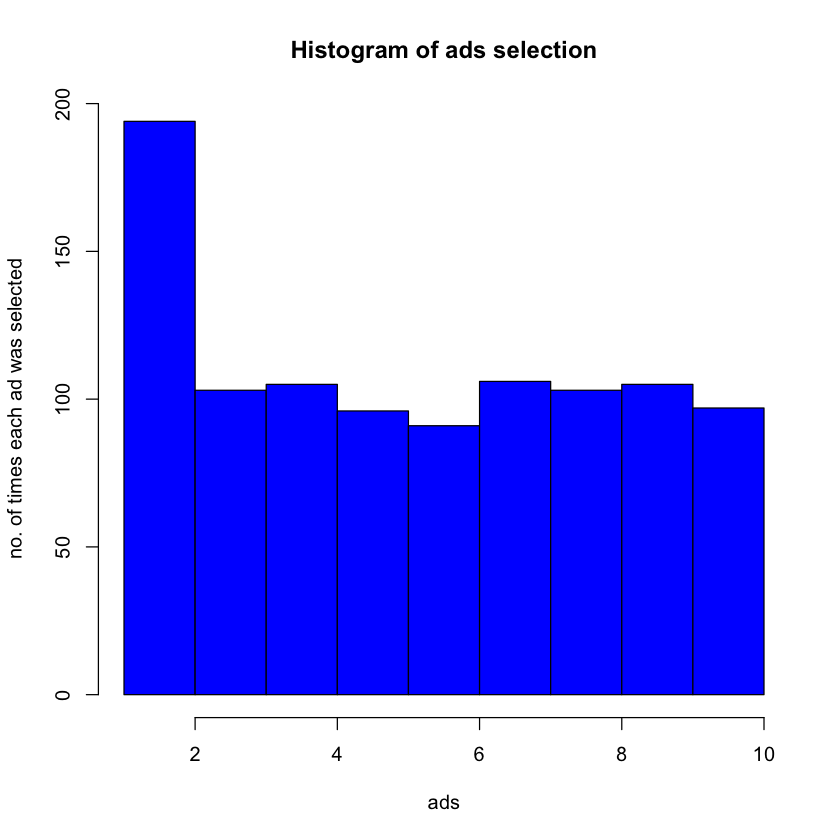

In [4]:
#Visualising the results
hist( ads_selected,
    col= 'blue',
    main = 'Histogram of ads selection',
    xlab = 'ads',
    ylab = 'no. of times each ad was selected')

#### We can see here from histogram of Ads clicked, It selects column 1. That's not a good model.

### Upper Confidence Bound

#### Now here instead of guessing randomly. We implement Upper Confidence bound algorithm to go through dataset one row at a time in three steps:
* At each round n (one row at a time),  we consider two numbers for each Ad i : Number of times the ad i was selected upto round n, sum of rewards of the ad i upto round n
* From these two numbers we compute : the average reward of ad i upto round n, upper bound of confidence interval upto round n 
* We select the Ad i that has max ucb

In [5]:
# Implementing UCB
N = 10000
d = 10
ads_selected = integer(0)
numbers_of_selections = integer(d)
sums_of_rewards = integer(d)
total_reward = 0
for (n in 1:N) {
  ad = 0
  max_upper_bound = 0
  for (i in 1:d) {
    if (numbers_of_selections[i] > 0) {
      average_reward = sums_of_rewards[i] / numbers_of_selections[i]
      delta_i = sqrt(3/2 * log(n) / numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    } else {
        upper_bound = 1e400
    }
    if (upper_bound > max_upper_bound) {
      max_upper_bound = upper_bound
      ad = i
    }
  }
  ads_selected = append(ads_selected, ad)
  numbers_of_selections[ad] = numbers_of_selections[ad] + 1
  reward = dataset[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward
  total_reward = total_reward + reward
}

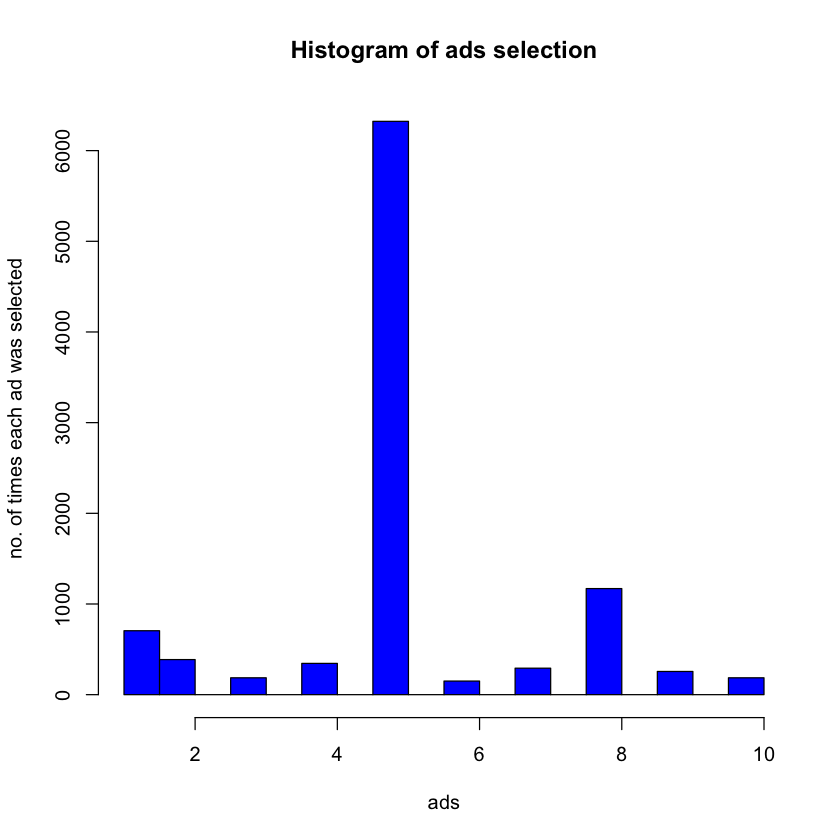

In [6]:
#Visualising the results
hist( ads_selected,
    col= 'blue',
    main = 'Histogram of ads selection',
    xlab = 'ads',
    ylab = 'no. of times each ad was selected')

#### This doesn't shows the actual click but just a way showing convergence rate of a column, where column 5 is highest

### The strategy is used when we give 10 versions of an ad and as they get clicked we implement this UCB Algo behind it and figure out the most liked/clicked ad by customers. Thus gradually we replace 10 ads with the one most liked.
### That's Reinforcement Learning.